## Extension: Analyzing the impact of Boston Police Department presence and activity on Community Safety and Perception


- Are the crime rates lower in areas with higher police presence? 
- Are they higher in areas with lower police presence? 
- Are police officers with higher salaries in places with higher/lower crime rates?
- Is there any relationship between police spending (specifically overtime) and improvements in community safety?
- Is there any relationship between police spending and crime rates in Boston?


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

field2015 =  pd.read_csv("../data/Field Activity/fieldcontactforpublic2015.csv")
field2016 =  pd.read_csv("../data/Field Activity/fieldcontactforpublic2016.csv")
field2017 = pd.read_csv("../data/Field Activity/rms_fieldcontacts_for_public_2017_202003111424.csv")
field2018 = pd.read_csv("../data/Field Activity/rms_fieldcontacts_for_public_2018_202003111433.csv")
field2019 =pd.read_csv("../data/Field Activity/rms_fieldcontacts_for_public_2019.csv")
field2020 = pd.read_csv("../data/Field Activity/mark43_fieldcontacts_for_public_2020_202104151551.csv")
field2021 =   pd.read_csv("../data/Field Activity/fio_2021-2.csv")
field2022 =  pd.read_csv("../data/Field Activity/fio-records-2022-mark43-fieldcontact-table.csv")


In [22]:
# looking at total field encounters
size17 = len(field2017)
size18 = len(field2018)
size19 = len(field2019)
size20 = len(field2020)
size21 = len(field2021)
size22 = len(field2022)

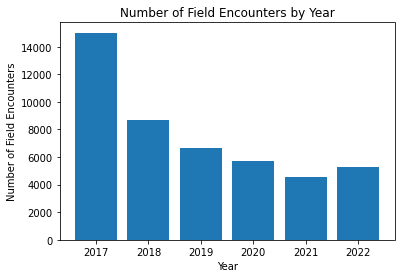

In [23]:
years = [2017, 2018, 2019, 2020, 2021, 2022]
sizes = [size17, size18, size19, size20, size21, size22]

# Create a bar graph
plt.bar(years, sizes)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Field Encounters')
plt.title('Number of Field Encounters by Year')

# Show the graph
plt.show()

In [24]:

crime15 =  pd.read_csv("../data/Crime Incident/crime15.csv")
crime16 =  pd.read_csv("../data/Crime Incident/crime16.csv")
crime17 =  pd.read_csv("../data/Crime Incident/crime17.csv")
crime18 =  pd.read_csv("../data/Crime Incident/crime18.csv")
crime19 =  pd.read_csv("../data/Crime Incident/crime19.csv")
crime20 =  pd.read_csv("../data/Crime Incident/crime20.csv")
crime21 =  pd.read_csv("../data/Crime Incident/crime21.csv")
crime22 =  pd.read_csv("../data/Crime Incident/crime22.csv")

C:\Users\opres\AppData\Local\Temp\ipykernel_18292\3338638598.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime19 =  pd.read_csv("../data/Crime Incident/crime19.csv")
C:\Users\opres\AppData\Local\Temp\ipykernel_18292\3338638598.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime20 =  pd.read_csv("../data/Crime Incident/crime20.csv")
C:\Users\opres\AppData\Local\Temp\ipykernel_18292\3338638598.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime21 =  pd.read_csv("../data/Crime Incident/crime21.csv")
C:\Users\opres\AppData\Local\Temp\ipykernel_18292\3338638598.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime22 =  pd.read_csv("../data/Crime Incident/crime22.csv")


In [25]:
numberCrimes15 = len(crime15)
numberCrimes16 = len(crime16)
numberCrimes17 = len(crime17)
numberCrimes18= len(crime18)
numberCrimes19 = len(crime19)
numberCrimes20 = len(crime20)
numberCrimes21 = len(crime21)
numberCrimes22 = len(crime22)
print(numberCrimes15)
print(numberCrimes16)

53597
99430


In [26]:
import numpy as np
operatingBudget = pd.read_csv("../data/Operating Budget/fy24-adopted-operating-budget.csv")
policeBudget = operatingBudget[operatingBudget['Dept'].str.contains("Police Department")]
policeBudget = policeBudget.replace('#Missing', np.nan)

In [27]:
pd.options.display.float_format = '{:.0f}'.format
policeBudget['FY21 Actual Expense'] = policeBudget['FY21 Actual Expense'].astype(float)
policeBudget['FY22 Actual Expense'] = policeBudget['FY22 Actual Expense'].astype(float)
policeBudget['FY23 Appropriation'] = policeBudget['FY23 Appropriation'].astype(float)
policeBudget['FY24 Adopted'] = policeBudget['FY24 Adopted'].astype(float)


columns = ['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']
policeBudget[columns] = policeBudget[columns].applymap(lambda x: 0 if x < 0 else x)

In [28]:
#14, 15 https://www.boston.gov/sites/default/files/embed/file/2016-10/12_public_safety_cabinet.pdf
#16, 17 https://www.boston.gov/sites/default/files/embed/file/2019-04/v3_11-_19_a_public-safety-cabinet.pdf
#18, 19, 20 https://www.boston.gov/sites/default/files/file/2020/10/V3%2012-%2021%20A%20Public-Safety-Cabinet.pdf
budget14 = 321000297
budget15 = 337310895
budget16 = 348887844
budget17 = 364594820
budget18 = 399924493
budget19 = 416762373
budget20 = 414306876


In [29]:
budget21 = policeBudget['FY21 Actual Expense'].sum()
budget22 = policeBudget['FY22 Actual Expense'].sum()
budget23 = policeBudget['FY23 Appropriation'].sum()
budget24 = policeBudget['FY24 Adopted'].sum()
print(budget21)
print(budget22)

422917516.8999999
420411576.37


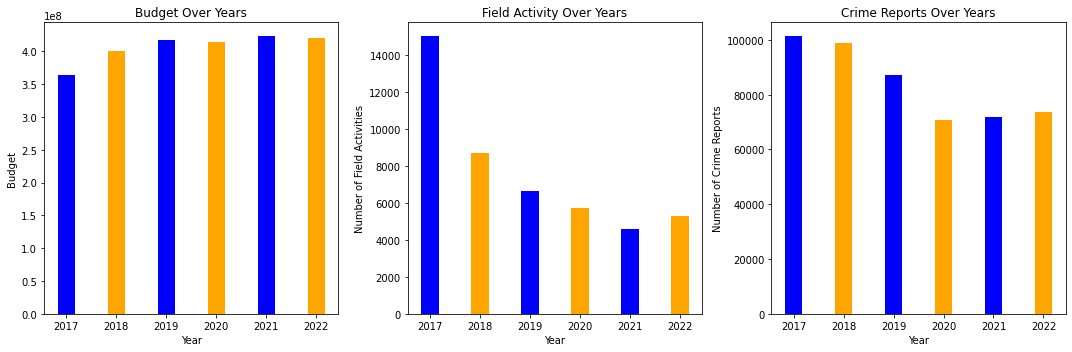

In [30]:
years = [i for i in range(2017, 2023)]
field = [size17, size18, size19, size20, size21, size22]
budgets = [budget17, budget18, budget19, budget20, budget21, budget22]
crimes = [numberCrimes17, numberCrimes18, numberCrimes19, numberCrimes20, numberCrimes21, numberCrimes22]

# Set up positions for the bars
bar_width = 0.35
index = np.arange(len(years))
colors = ['blue', 'orange']

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot budget bar graph in the first subplot
ax1.bar(index, budgets, bar_width, color=colors)
ax1.set_xlabel('Year')
ax1.set_ylabel('Budget')
ax1.set_title('Budget Over Years')
ax1.set_xticks(index)
ax1.set_xticklabels(years)

# Plot size bar graph in the second subplot
ax2.bar(index, field, bar_width, color=colors)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Field Activities')
ax2.set_title('Field Activity Over Years')
ax2.set_xticks(index)
ax2.set_xticklabels(years)

ax3.bar(index, crimes, bar_width, color=colors)
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Crime Reports')
ax3.set_title('Crime Reports Over Years')
ax3.set_xticks(index)
ax3.set_xticklabels(years)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the graph
plt.show()

<Axes: >

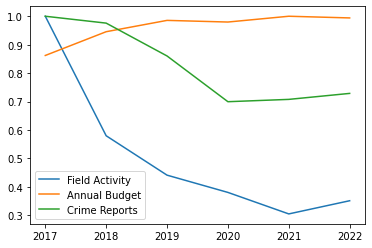

In [31]:
years = [i for i in range(2017, 2023)]
field = [size17, size18, size19, size20, size21, size22]
budgets = [budget17, budget18, budget19, budget20, budget21, budget22]
crimes = [numberCrimes17, numberCrimes18, numberCrimes19, numberCrimes20, numberCrimes21, numberCrimes22]

std_field = [i/max(field) for i in field]
std_budgets = [i/max(budgets) for i in budgets]
std_crimes = [i/max(crimes) for i in crimes]

df = pd.DataFrame({'Field Activity': std_field, 'Annual Budget': std_budgets, 
                   'Crime Reports': std_crimes},
                   index=years)
df.plot.line()

Text(0, 0.5, 'Annual Budget ($100,000,000)')

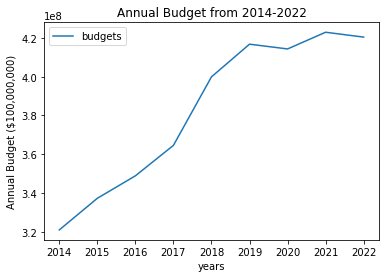

In [32]:
#field 17-22
#crime 15-22
#budget 14-22
years = [i for i in range(2014, 2023)]
field = [size17, size18, size19, size20, size21, size22]
budgets = [budget14, budget15, budget16, budget17, budget18, budget19, budget20, budget21, budget22]
crimes = [numberCrimes17, numberCrimes18, numberCrimes19, numberCrimes20, numberCrimes21, numberCrimes22]

df = pd.DataFrame({'years': years, 'budgets': budgets})
df.plot.line(x='years', y='budgets')
plt.title('Annual Budget from 2014-2022')
plt.ylabel('Annual Budget ($100,000,000)')

Text(0, 0.5, 'Annual Crimes')

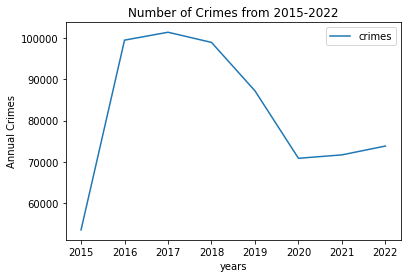

In [33]:
#field 17-22
#crime 15-22
#budget 14-22
years = [i for i in range(2015, 2023)]
crimes = [numberCrimes15, numberCrimes16, numberCrimes17, numberCrimes18, 
          numberCrimes19, numberCrimes20, numberCrimes21, numberCrimes22]

df = pd.DataFrame({'years': years, 'crimes': crimes})
df.plot.line(x='years', y='crimes')
plt.title('Number of Crimes from 2015-2022')
plt.ylabel('Annual Crimes')

Text(0.5, 1.0, 'Police budget vs Overtime Pay from 2015-2022')

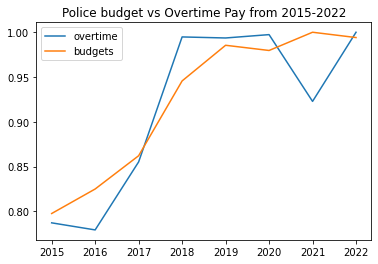

In [34]:
overtime = [61608144.93, 60989917.25, 66933649.86999999, 77855435.97999999, 77764302.50999999, 78057696.23, 72222785.03, 78265402.51]
budgets = [budget15, budget16, budget17, budget18, budget19, budget20, budget21, budget22]
years =[2015,2016,2017,2018,2019,2020,2021,2022]

std_budgets = [i/max(budgets) for i in budgets]
std_overtime = [i/max(overtime) for i in overtime]


df = pd.DataFrame({'overtime': std_overtime, 'budgets': std_budgets}, index=years)
df.plot.line()
plt.title('Police budget vs Overtime Pay from 2015-2022')

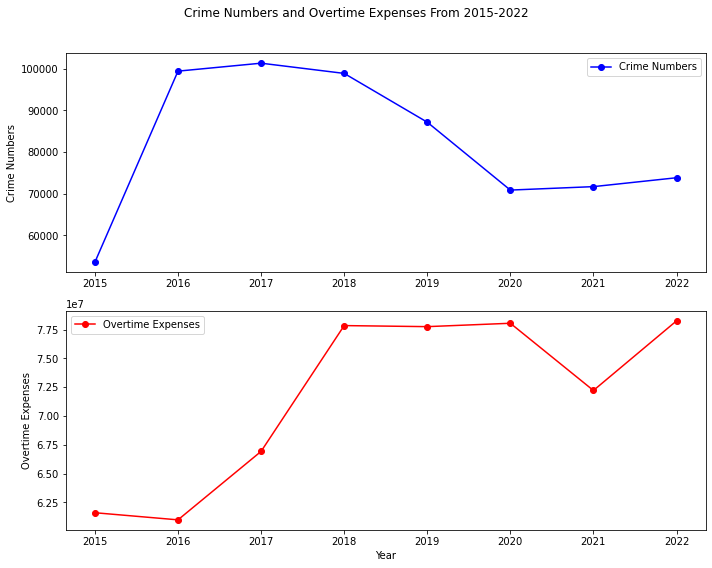

In [35]:
crimes = [numberCrimes15, numberCrimes16, numberCrimes17, numberCrimes18, numberCrimes19, numberCrimes20, numberCrimes21, numberCrimes22]
overtime = [61608144.93, 60989917.25, 66933649.86999999, 77855435.97999999, 77764302.50999999, 78057696.23, 72222785.03, 78265402.51]
years =[2015,2016,2017,2018,2019,2020,2021,2022]
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot crime numbers in the first subplot
ax1.plot(years, crimes, marker='o', color='blue', label='Crime Numbers')
ax1.set_ylabel('Crime Numbers')
ax1.legend()

# Plot overtime expenses in the second subplot
ax2.plot(years, overtime, marker='o', color='red', label='Overtime Expenses')
ax2.set_xlabel('Year')
ax2.set_ylabel('Overtime Expenses')
ax2.legend()

# Add title
fig.suptitle('Crime Numbers and Overtime Expenses From 2015-2022')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the graph
plt.show()

In [36]:
crime15['SHOOTING'] = crime15['SHOOTING'].fillna(0)
crime16['SHOOTING'] = crime16['SHOOTING'].fillna(0)
crime17['SHOOTING'] = crime17['SHOOTING'].fillna(0)
crime18['SHOOTING'] = crime18['SHOOTING'].fillna(0)
crime19['SHOOTING'] = crime19['SHOOTING'].fillna(0)
crime20['SHOOTING'] = crime20['SHOOTING'].fillna(0)
crime21['SHOOTING'] = crime21['SHOOTING'].fillna(0)
crime22['SHOOTING'] = crime22['SHOOTING'].fillna(0)

crime15['SHOOTING'] = crime15['SHOOTING'].replace('Y', 1)
crime16['SHOOTING'] = crime16['SHOOTING'].replace('Y', 1)
crime17['SHOOTING'] = crime17['SHOOTING'].replace('Y', 1)
crime18['SHOOTING'] = crime18['SHOOTING'].replace('Y', 1)
crime19['SHOOTING'] = crime19['SHOOTING'].replace('Y', 1)
crime20['SHOOTING'] = crime20['SHOOTING'].replace('Y', 1)
crime21['SHOOTING'] = crime21['SHOOTING'].replace('Y', 1)
crime22['SHOOTING'] = crime22['SHOOTING'].replace('Y', 1)

shooting15 = crime15['SHOOTING'].sum()
shooting16 = crime16['SHOOTING'].sum()
shooting17 = crime17['SHOOTING'].sum()
shooting18 = crime18['SHOOTING'].sum()
shooting19 = crime19['SHOOTING'].sum()
shooting20 = crime20['SHOOTING'].sum()
shooting21 = crime21['SHOOTING'].sum()
shooting22 = crime22['SHOOTING'].sum()


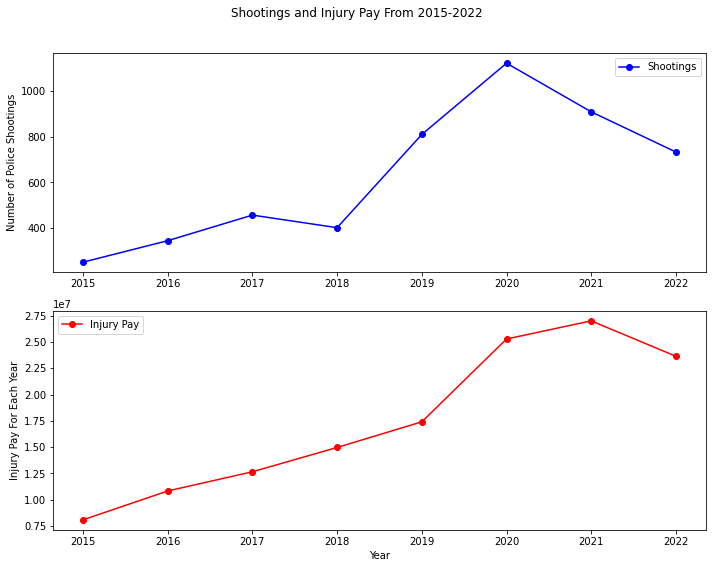

In [37]:
shootings = [shooting15, shooting16, shooting17, shooting18, shooting19, shooting20, shooting21, shooting22]
injuryTotal = [8095216.93, 10838924.379999999, 12661907.719999999, 14971892.08, 17404626.34, 25272751.17, 26994382.02, 23628467.04]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot crime numbers in the first subplot
ax1.plot(years, shootings, marker='o', color='blue', label='Shootings')
ax1.set_ylabel('Number of Police Shootings')
ax1.legend()

# Plot overtime expenses in the second subplot
ax2.plot(years, injuryTotal, marker='o', color='red', label='Injury Pay')
ax2.set_xlabel('Year')
ax2.set_ylabel('Injury Pay For Each Year')
ax2.legend()

# Add title
fig.suptitle('Shootings and Injury Pay From 2015-2022')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the graph
plt.show()


In [46]:
field2017.columns

Index(['fc_num', 'contact_date', 'contact_officer', 'contact_officer_name',
       'supervisor', 'supervisor_name', 'street', 'city', 'state', 'zip',
       'frisked', 'searchperson', 'searchvehicle', 'summonsissued',
       'stop_duration', 'circumstance', 'basis', 'vehicle_year',
       'vehicle_state', 'vehicle_make', 'vehicle_model', 'vehicle_color',
       'vehicle_style', 'vehicle_type', 'contact_reason'],
      dtype='object')

In [79]:
officerNames15 = field2015['contact_officer'].value_counts()
officerNames16 = field2016['contact_officer'].value_counts()
officerNames17 = field2017['contact_officer'].value_counts()
officerNames18 = field2018['contact_officer'].value_counts()
officerNames19 = field2019['contact_officer'].value_counts()
officerNames20 = field2020['contact_officer'].value_counts()
officerNames21 = field2021['contact_officer'].value_counts()
officerNames22 = field2022['contact_officer'].value_counts()

In [80]:
combinedOfficer = pd.concat([officerNames15, officerNames16, officerNames17, officerNames18, officerNames19, officerNames20, officerNames21, officerNames22], axis=0, sort=True)
# combinedOfficer = combinedOfficer.value_counts()
combinedOfficer = combinedOfficer[combinedOfficer > 50]

In [81]:
combinedOfficer = set(combinedOfficer.index)

len(combinedOfficer)

140

In [85]:
overtimeUsers = pd.read_csv("../data/Overtime/frequent overtime users1.csv")

overtimeUsersId = overtimeUsers['Emp_ID']

In [86]:
employeeIdOvertime = list(overtimeUsersId.array)

employeeIdOvertime = [int(x) for x in employeeIdOvertime]
employeeIdOvertime = set(employeeIdOvertime)


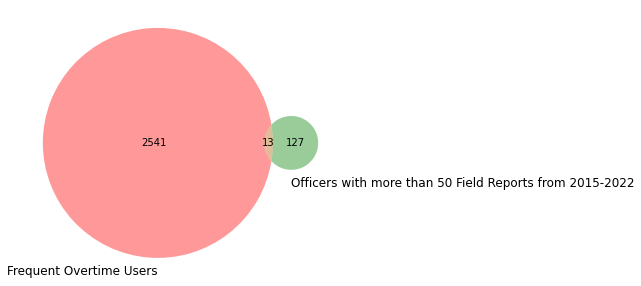

In [91]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

employee_ids1 = set(employeeIdOvertime)
employee_ids2 = combinedOfficer

plt.figure(figsize=(8, 5), facecolor='white')

venn_labels = {'10': f"Series 1 Only\n{len(employee_ids1 - employee_ids2)}", '01': f"Series 2 Only\n{len(employee_ids2 - employee_ids1)}", '11': f"Overlap\n{len(employee_ids1 & employee_ids2)}"}
venn2(subsets=(len(employee_ids1 - employee_ids2), len(employee_ids2 - employee_ids1), len(employee_ids1 & employee_ids2)),
      set_labels = ('Frequent Overtime Users', 'Officers with more than 50 Field Reports from 2015-2022')
)
# Show the plot
plt.show()

{'2108': 1471, '2109': 228, '2110': 444, '2111': 2335, '2113': 118, '2114': 494, '2115': 504, '2116': 1323, '2118': 3134, '2119': 5927, '2120': 1628, '2121': 3701, '2122': 1692, '2124': 3997, '2125': 2715, '2126': 1489, '2127': 1393, '2128': 1152, '2129': 620, '2130': 2014, '2131': 291, '2132': 209, '2134': 839, '2135': 838, '2136': 362, '2199': 92, '2203': 121, '2210': 14, '2215': 355}


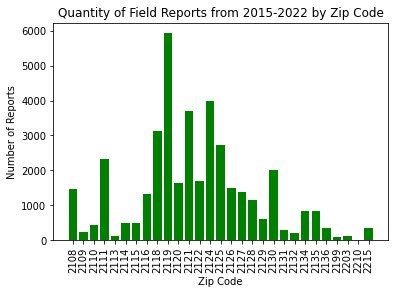

In [93]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fiolist = [field2015, field2016, field2017, field2018, field2019, field2020]
cols_to_drop = ['fc_num', 'vehicle_year', 'vehicle_state', 'vehicle_color', 'vehicle_model', 'vehicle_style', 'vehicle_type', 'weather']
# for df in fiolist:
#     for col in cols_to_drop:
#         df.drop(col, axis=1, inplace=True)
zipcodes = {}
for df in fiolist:
    for code in df['zip']:
        # assert type(code) == int
        if type(code) != str or code == None or '-' in code or code == 'nan' or code == '00000':
            continue
        if code in zipcodes:
            zipcodes[code] += 1
        else:
            zipcodes[code] = 1
    topop = []
    for x in zipcodes:
        if zipcodes[x] < 10:
            topop.append(x)
    for x in topop:
        zipcodes.pop(x)
ziplist = []
for key in zipcodes:
    ziplist.append(int(key))
ziplist = sorted(ziplist)
new_dict = {int(key): value for key, value in zipcodes.items()}
zipdict = {}
for x in ziplist:
    zipdict[str(x)] = new_dict[x]
print(zipdict)
plt.bar(zipdict.keys(), zipdict.values(), color='g') #this is in ascending value of zipcodes
# plt.bar(zipcodes.keys(), zipcodes.values(), color='g') #this is in random order of zipcodes
plt.xticks(rotation=90)
plt.xlabel('Zip Code')
plt.ylabel('Number of Reports')
plt.title('Quantity of Field Reports from 2015-2022 by Zip Code')
plt.show()